In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from PC_SL import *

In [2]:
df_asia = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\asia_10000.dat")
df_child = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\child.dat")
df_insurance = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\insurance.dat")
df_water = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\Water_1000.dat")
df_alarm = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\alarm_10000.dat")
df_barley = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\barley.dat")
df_hailfinder = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\hailfinder.dat")
df_hepar2 = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\hepar2.dat")
df_andes = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\andes.dat")
df_link = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\link.dat")
df_pathfinder = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\pathfinder.dat")
df_munin2 = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\munin2.dat")

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
the number of restricted edges is : 19
**********
BN has score -22466.396546491495
**********
Eight<-Six,Three -4150.291729106073
Three<-One -6425.369680905482
Six<-Five,Two -5.611578690688475
Five<- -637.1389375744329
Four<-Five -524.4552285079117
One<-Two -6673.4355503353145
Two<- -2168.641652909864
Seven<-Six -1881.452188461728
**********
bnlearn modelstring = 
[Eight|Three:Six][Three|One][Six|Five:Two][Five][Four|Five][One|Two][Two][Seven|Six]
**********
CPDAG:
Vertices: Eight,Three,Six,Five,Four,One,Two,Seven
Three->Eight
Six->Eight
Six->Seven
Five-Four
Five->Six
One-Three
Two-One
Two->Six



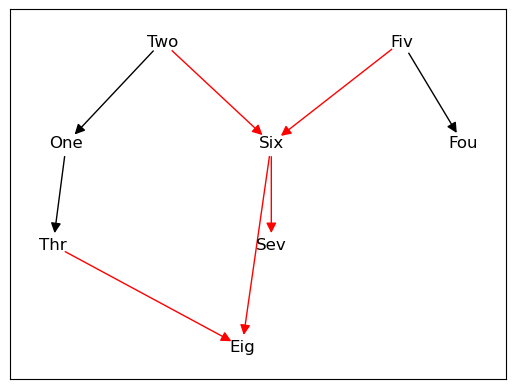

the time taken to learn the network is: 0.9530043601989746 seconds
CPU times: total: 922 ms
Wall time: 953 ms


In [4]:
%%time
toc = time.time()
'''
restrict phase
'''
j_0 = Gobnilp()
k = PC_SL(df_asia, 1, 0.05)
for i in k:
    j_0.add_forbidden_adjacency((i[0], i[1]))
'''
score phase
'''
#score phase##
j_0.learn(r'C:\Users\User\Documents\GitHub\ML_FYP\dataset\asia_10000.dat')
tic = time.time()
print('the time taken to learn the network is:', tic - toc, 'seconds')

Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-21
Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
**********
BN has score -22466.396546491495
**********
Eight<-Six,Three -4150.291729106073
Three<- -6901.1493808303785
Six<-Five,Two -5.611578690688475
Five<-Four -633.8404777927353
Four<- -527.7536882896093
One<-Three -6460.081285708176
Seven<-Six -1881.452188461728
Two<-One -1906.2162176121055
**********
bnlearn modelstring = 
[Eight|Three:Six][Three][Six|Five:Two][Five|Four][Four][One|Three][Seven|Six][Two|One]
**********
CPDAG:
Vertices: Eight,Three,Six,Five,Four,One,Seven,Two
Three->Eight
Three-One
Six->Eight
Six->Seven
Five->Six
Four-Five
One-Two
Two->Six



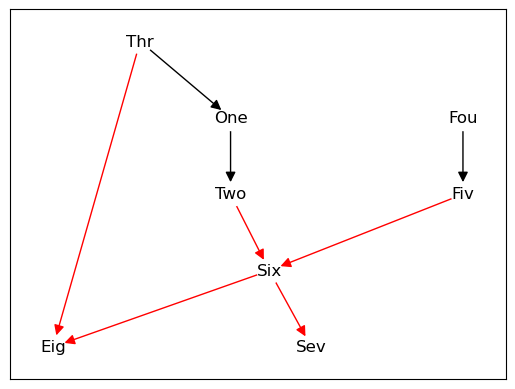

the time taken to learn the network is: 1.7917141914367676 seconds
CPU times: total: 2.16 s
Wall time: 1.79 s


In [3]:
%%time
toc = time.time()

'''
score
'''
T = Gobnilp()
#score phase##
T.learn(r'C:\Users\User\Documents\GitHub\ML_FYP\dataset\asia_10000.dat')
tic = time.time()
print('the time taken to learn the network is:', tic - toc, 'seconds')

In [86]:
k = []
for i in j_0.adjacency.items():
    if i[1].X >= 1:
#         print(i[0])
        k.append(i[0])


In [89]:
v = [list(x) for x in k]
v

[['Eight', 'Six'],
 ['Three', 'Eight'],
 ['Four', 'Five'],
 ['Five', 'Six'],
 ['Three', 'One'],
 ['Two', 'One'],
 ['Six', 'Seven'],
 ['Two', 'Six']]

In [70]:
list(k)

['Eight-Six',
 'Eight-Three',
 'Five-Four',
 'Five-Six',
 'One-Three',
 'One-Two',
 'Seven-Six',
 'Six-Two']

In [97]:
def F_score():
    #j_0#
    j_0_frozenset = []
    for i in j_0.adjacency.items():
        if i[1].X >= 1:
            j_0_frozenset.append(i[0])
    hybrid = [list(x) for x in j_0_frozenset]
    ##
    
    T_frozenset = []
    for i in T.adjacency.items():
        if i[1].X >= 1:
            T_frozenset.append(i[0])
    real = [list(x) for x in T_frozenset]
    
    #Finding TP, FP, FN#
    TP = [x for x in hybrid if x in (y for y in real)]
    FP = [x for x in hybrid if x not in (y for y in real)]
    FN = [x for x in real if x not in (y for y in hybrid)]
    
    # F
    return TP, FP, FN

In [98]:
F_score()

([['Eight', 'Six'],
  ['Three', 'Eight'],
  ['Four', 'Five'],
  ['Five', 'Six'],
  ['Three', 'One'],
  ['Two', 'One'],
  ['Six', 'Seven'],
  ['Two', 'Six']],
 [],
 [])